# Preliminary Data Exploration

### Retreive California Housing Dataset from Kaggle
https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Uncomment and run to set up environment

In [300]:
# !conda env create -f ../environment.yml
# !conda env update -f ../environment.yml

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
data = pd.read_csv('../data/housing.csv')
data = data.drop('ocean_proximity', axis=1)

In [304]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## First we look at each variable in isolation

In [305]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Here are the plots of the densities of each variable. Notice that none of them are perfectly normally distributed.

(0.0, 0.0353655732177128)

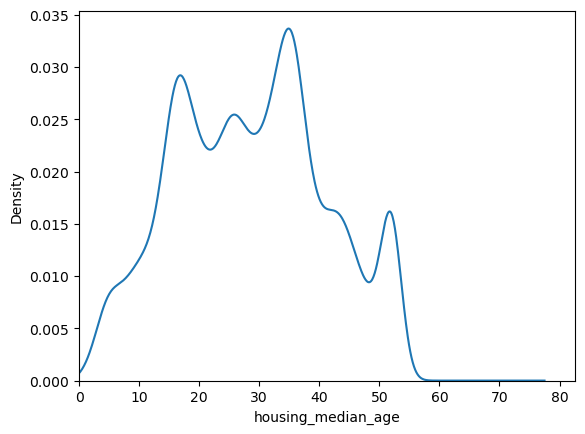

In [306]:
plt.figure()
data['housing_median_age'].plot(kind='density')
plt.xlabel('housing_median_age')
plt.xlim(0,)
plt.ylim(0,)

(0.0, 0.0019937920957551684)

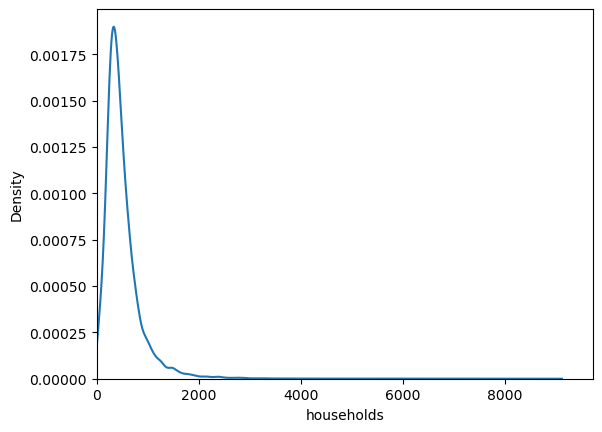

In [307]:
plt.figure()
data['households'].plot(kind='density')
plt.xlabel('households')
plt.xlim(0,)
plt.ylim(0,)

(0.0, 0.00037336681475262835)

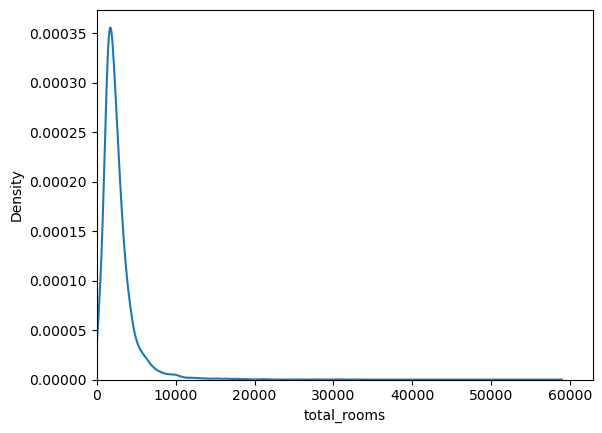

In [308]:
plt.figure()
data['total_rooms'].plot(kind='density')
plt.xlabel('total_rooms')
plt.xlim(0,)
plt.ylim(0,)

(0.0, 0.0018620580392615701)

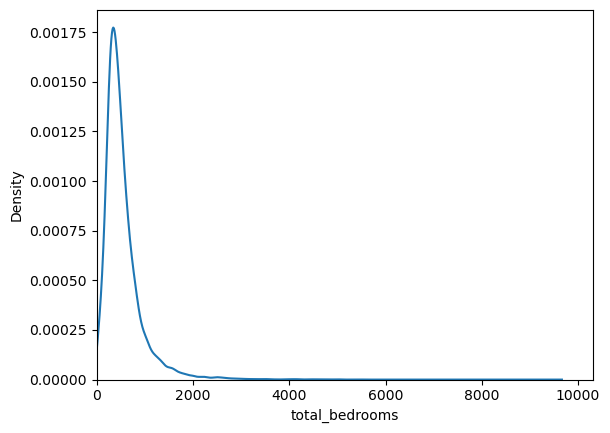

In [309]:
plt.figure()
data['total_bedrooms'].plot(kind='density')
plt.xlabel('total_bedrooms')
plt.xlim(0,)
plt.ylim(0,)

(0.0, 0.0006781948272111824)

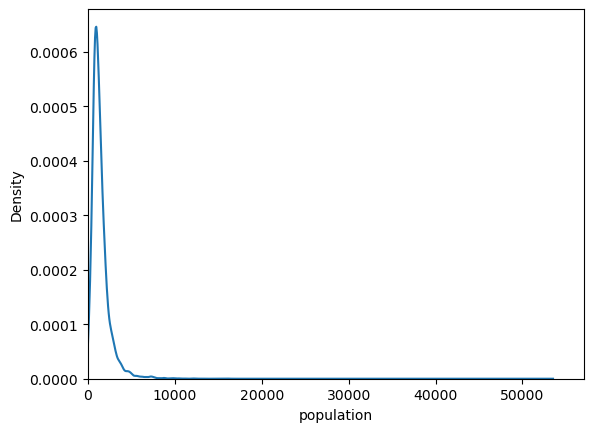

In [310]:
plt.figure()
data['population'].plot(kind='density')
plt.xlabel('population')
plt.xlim(0,)
plt.ylim(0,)

(0.0, 0.2740057782584137)

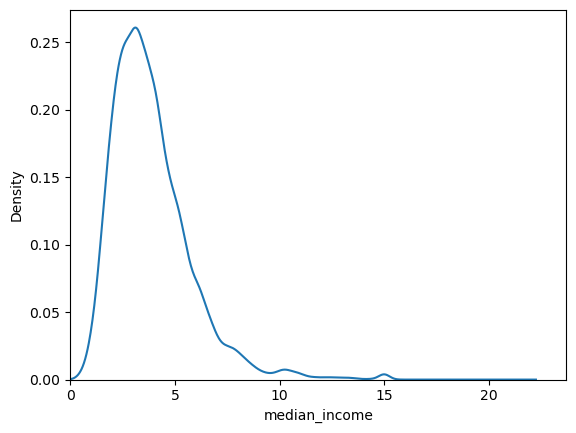

In [311]:
plt.figure()
data['median_income'].plot(kind='density')
plt.xlabel('median_income')
plt.xlim(0,)
plt.ylim(0,)

(0.0, 4.55546133269285e-06)

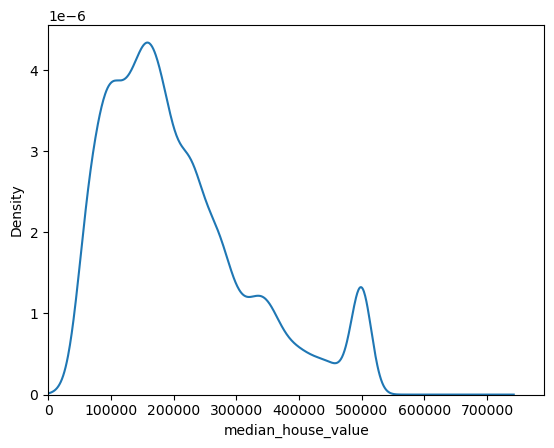

In [312]:
plt.figure()
data['median_house_value'].plot(kind='density')
plt.xlabel('median_house_value')
plt.xlim(0,)
plt.ylim(0,)

### The density plot of median_house_value raises a question: what accounts for the second peak around 500,000?

## Now, we compare variables

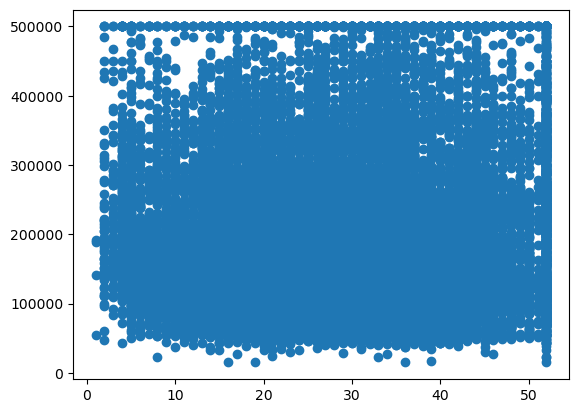

In [313]:
plt.figure()
plt.scatter(data['housing_median_age'], data['median_house_value'])

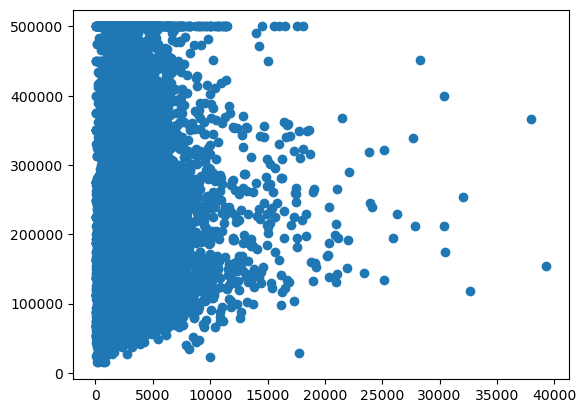

In [314]:
plt.figure()
plt.scatter(data['total_rooms'], data['median_house_value'])

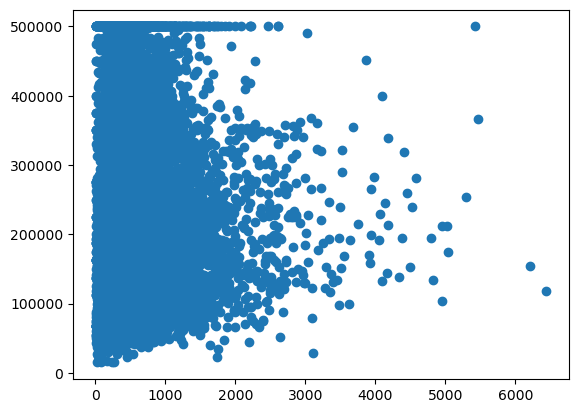

In [315]:
plt.figure()
plt.scatter(data['total_bedrooms'], data['median_house_value'])

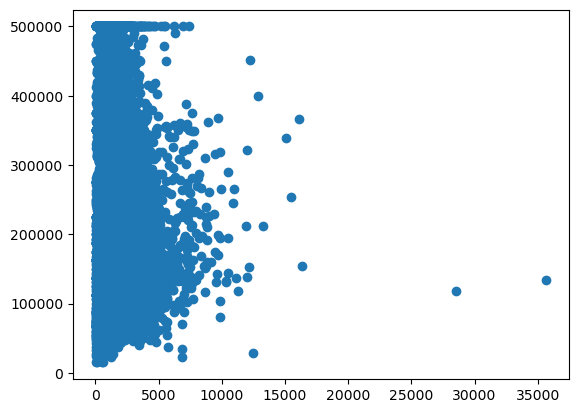

In [316]:
plt.figure()
plt.scatter(data['population'], data['median_house_value'])

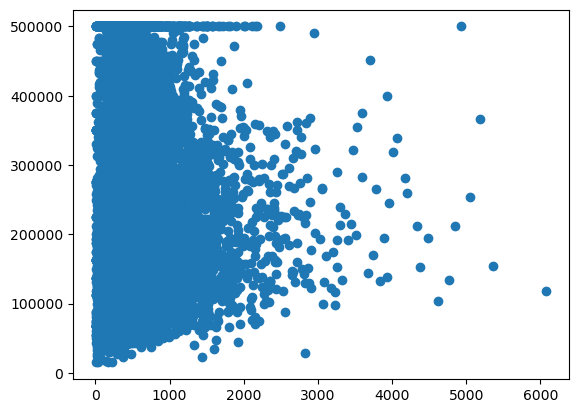

In [317]:
plt.figure()
plt.scatter(data['households'], data['median_house_value'])

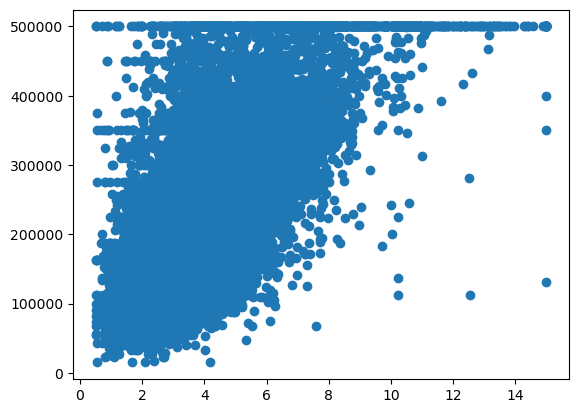

In [318]:
plt.figure()
plt.scatter(data['median_income'], data['median_house_value'])

### From these plots, notice how the media_home_price of 500,000 seems to be fairly evenly distributed across the other variables. This may interfere with detecting larger scale patterns.

### The correlation matrix tells us that the four variables, total_rooms, total_bedrooms, population, and households, are redundant.

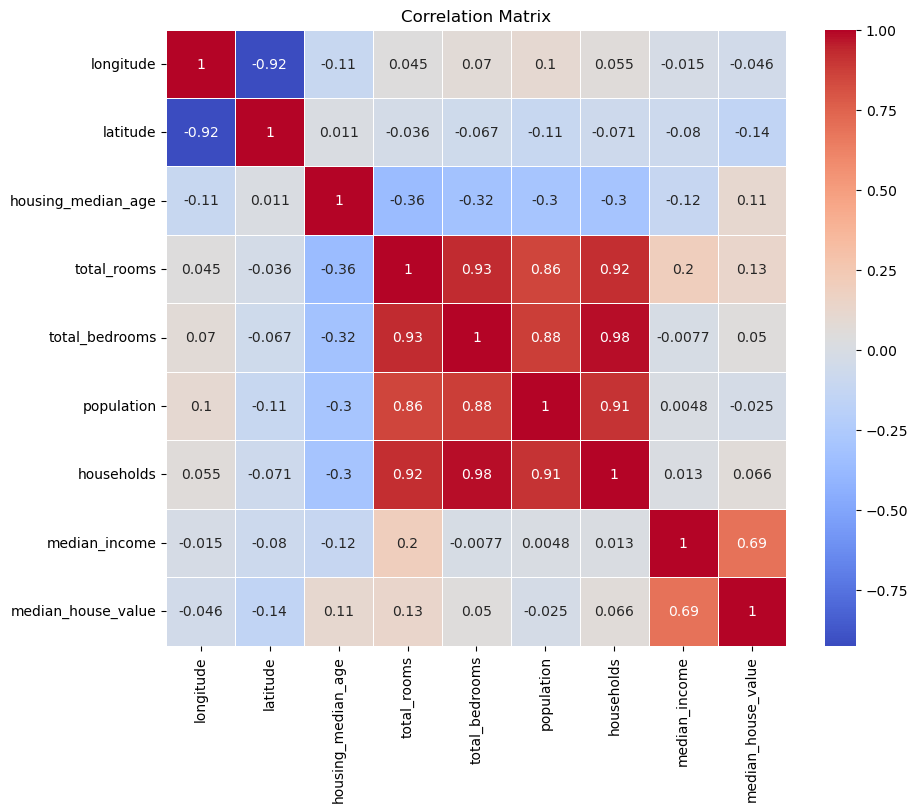

In [319]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### In terms of a graph, the high correlation looks like this

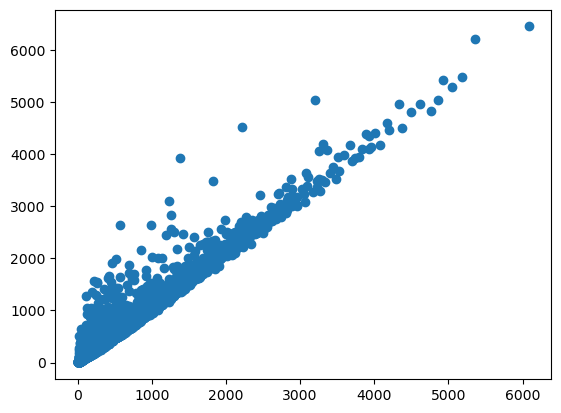

In [320]:
plt.figure()
plt.scatter(data['households'],data['total_bedrooms'])

## We can break up the data into house value brackets 

In [321]:
low_price = data[(data['median_house_value'] >= 100000) & (data['median_house_value'] <= 200000)]
mid_price= data[(data['median_house_value'] >= 200000) & (data['median_house_value'] <= 300000)]
high_price = data[(data['median_house_value'] >= 300000) & (data['median_house_value'] <= 400000)]
crazy_price = data[(data['median_house_value'] >= 400000) & (data['median_house_value'] <= 500000)]

### The following shows that mean housing_median_age increases with median_house_value. Also most of our data is concentrated in the lower tiers of housing_median_age.

In [322]:
low_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,8335.000000,8335.000000,8335.000000,8335.000000,8258.000000,8335.000000,8335.000000,8335.000000,8335.000000
mean,-119.299680,35.448859,27.423755,2550.100420,546.363526,1535.532573,504.853389,3.291040,150509.778044
std,1.938554,2.172695,12.514159,2185.132681,436.359367,1254.555261,391.851261,1.076353,28033.779106
min,-124.300000,32.550000,1.000000,2.000000,2.000000,6.000000,2.000000,0.499900,100000.000000
25%,-121.310000,33.910000,17.000000,1372.500000,297.000000,826.000000,279.000000,2.523050,126750.000000
50%,-118.290000,34.120000,28.000000,2020.000000,439.000000,1246.000000,411.000000,3.203700,151900.000000
75%,-117.900000,37.780000,36.000000,3018.500000,652.000000,1868.500000,609.500000,4.004550,173900.000000
max,-115.320000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,200000.000000


In [323]:
mid_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4919.000000,4919.000000,4919.000000,4919.000000,4866.000000,4919.000000,4919.000000,4919.000000,4919.000000
mean,-119.649514,35.350024,28.473877,2906.170360,582.214961,1502.084773,549.140882,4.326501,243910.002033
std,1.991686,1.900472,12.457315,2319.020439,450.830751,1131.349700,412.482947,1.317904,27431.488423
min,-123.810000,32.560000,2.000000,18.000000,3.000000,5.000000,3.000000,0.536000,200000.000000
25%,-121.950000,33.870000,18.000000,1625.000000,318.250000,836.000000,308.500000,3.340900,220800.000000
50%,-118.450000,34.190000,28.000000,2355.000000,470.000000,1230.000000,447.000000,4.267200,240300.000000
75%,-118.025000,37.480000,36.000000,3457.000000,703.750000,1809.000000,659.000000,5.256650,266700.000000
max,-114.620000,40.630000,52.000000,32054.000000,5290.000000,15507.000000,5050.000000,12.500000,300000.000000


In [324]:
high_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2122.00000,2122.000000,2122.000000,2122.000000,2104.000000,2122.000000,2122.000000,2122.000000,2122.000000
mean,-119.87942,35.462743,30.167295,3069.863808,570.251426,1383.683789,537.575401,5.202928,344653.817154
std,2.01433,1.875626,13.389455,2640.070169,460.476506,1186.607192,427.184470,1.719601,27126.823993
min,-123.00000,32.660000,2.000000,15.000000,3.000000,3.000000,3.000000,0.536000,300000.000000
25%,-122.08000,33.930000,19.000000,1709.250000,311.000000,775.500000,301.000000,3.924325,322600.000000
50%,-118.54000,34.200000,30.000000,2484.000000,453.500000,1122.000000,431.000000,5.148950,342900.000000
75%,-118.22250,37.550000,40.000000,3585.000000,667.000000,1594.000000,624.000000,6.409425,364575.000000
max,-116.25000,39.190000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,400000.000000


In [325]:
crazy_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,806.000000,806.000000,806.000000,806.000000,795.000000,806.000000,806.000000,806.000000,806.000000
mean,-119.883462,35.436935,32.457816,2948.136476,538.040252,1239.019851,506.944169,5.799500,442555.831266
std,2.031189,1.873245,13.269217,2065.064913,356.405835,865.661218,329.630059,2.112691,28857.710200
min,-122.710000,32.630000,2.000000,20.000000,5.000000,15.000000,4.000000,0.880400,400000.000000
25%,-122.160000,33.970000,24.000000,1740.250000,304.000000,727.250000,289.250000,4.133400,417600.000000
50%,-118.490000,34.170000,33.000000,2445.500000,458.000000,1034.500000,429.000000,5.744450,439150.000000
75%,-118.210000,37.530000,42.750000,3631.250000,677.500000,1568.250000,646.750000,7.276175,463500.000000
max,-116.440000,39.010000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,15.000100,500000.000000


## Summary of Data Exploration

### We have seen that median_housing_value is positively correlated with median_income. The variables population, total_rooms, total_bedrooms, and households all have a strong correlation with eachother. The data is concentrated in the lower median_housing_value brackets, and there are some $500,000 areas that seem to break the overall pattern of the data. Furthermore, none of the individual variables have a perfect normal distribution. 

### The question still remains: why is there a second peak in the median_house_value density plot?

## Here is the data break up

In [326]:
data.dropna(inplace=True)

X = data.values
feature_names = data.columns[:-1]
X = X[:,:-1]
X = X.astype('float64')
print(feature_names)
X.shape

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


(20433, 8)

In [327]:
y = data.values
predict_name = data.columns[-1:]
y = y[:,-1:]
y = y.astype('float64')
print(predict_name)
y.shape

Index(['median_house_value'], dtype='object')


(20433, 1)

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=999)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5, random_state=999)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(16346, 8) (16346, 1)
(2043, 8) (2043, 1)
(2044, 8) (2044, 1)


## Question: Which features seem to be the most important in this dataset?

I hope to answer this by running LASSO regression and seeing which feature weights are set to zero last

In [329]:
import sklearn
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_i

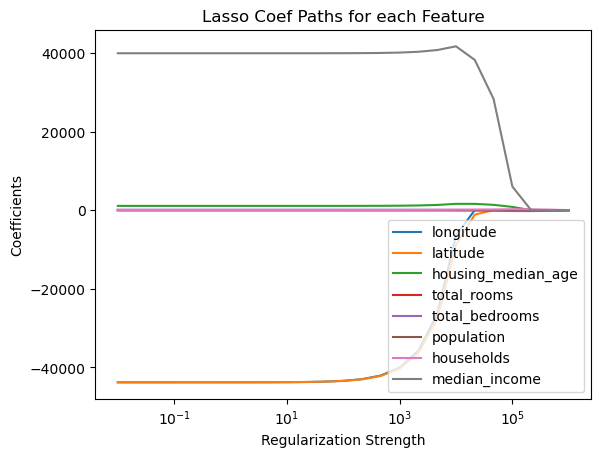

In [347]:
print(list(feature_names))

regs = []
coefs = []

for alpha in np.logspace(-2, 6, num=25, base=10):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    print(list(feature_names[np.where(lasso.coef_ != 0)]))

    regs.append(alpha)
    coefs.append(lasso.coef_)

for i in range(len(coefs[0])):
    plt.plot(regs, [coef[i] for coef in coefs], label=feature_names[i])

plt.xlabel('Regularization Strength')
plt.ylabel('Coefficients')
plt.title('Lasso Coef Paths for each Feature')
plt.xscale('log')
#plt.yscale('symlog')
plt.legend()

## Looks like total_rooms, total_bedrooms and population work together to predict median_house_value...

This disagrees with our previous analysis. Perhaps there is something in the data that can help us figure out this disconnect?

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_i

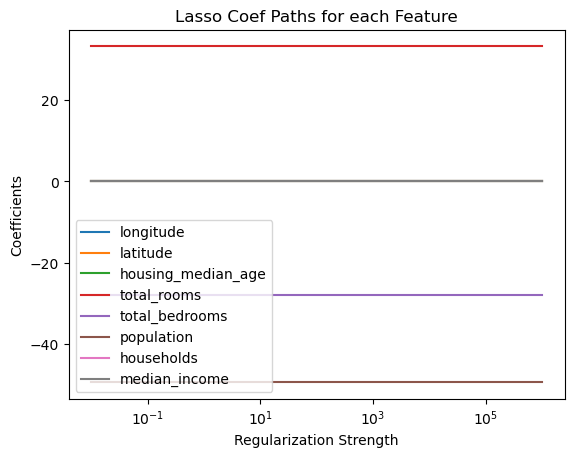

In [354]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regs = []
coefs = []

print(list(feature_names))
for alpha in np.logspace(-2, 6, num=25, base=10):
    pipe = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    pipe.fit(X_train, y_train)
    print(list(feature_names[np.where(pipe[1].coef_ != 0)]))
    
    regs.append(alpha)
    coefs.append(lasso.coef_)

for i in range(len(coefs[0])):
    plt.plot(regs, [coef[i] for coef in coefs], label=feature_names[i])

plt.xlabel('Regularization Strength')
plt.ylabel('Coefficients')
plt.title('Lasso Coef Paths for each Feature')
plt.xscale('log')
#plt.yscale('symlog')
plt.legend()

print(regs)
print(coefs)

## Now it looks like median_income is the most important. That seems more like it!

From the sklearn docs: `"For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected."`

Now lets fit ridge regression to this model with all features, and then with a subset to see how well we do.

Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
reg: 6.4e-05 \ RMSE: 72003.88366391932
reg: 9.766700135941112e-05 \ RMSE: 72003.88355250153
reg: 0.000149044424289675 \ RMSE: 72003.88338247284
reg: 0.00022744878108925528 \ RMSE: 72003.88312300113
reg: 0.0003470975064350104 \ RMSE: 72003.88272703529
reg: 0.0005296870723880683 \ RMSE: 72003.88212277326
reg: 0.000808327312796687 \ RMSE: 72003.88120064196
reg: 0.0012335453868400495 \ RMSE: 72003.87979342852
reg: 0.0018824481089594104 \ RMSE: 72003.87764595971
reg: 0.002872704094011867 \ RMSE: 72003.87436883317
reg: 0.004383881166485043 \ RMSE: 72003.8693678112
reg: 0.006690008247602992 \ RMSE: 72003.86173607968
reg: 0.010209266322079885 \ RMSE: 72003.85008984504
reg: 0.015579819183705712 \ RMSE: 72003.83231748384
reg: 0.023775534709286957 \ RMSE: 72003.8051968167
reg: 0.03628258094957272 \ RMSE: 72003.76381124544
reg: 0.055368920045700945 \ RMSE: 72003.7

Text(0.5, 1.0, 'RMSE vs. Regularization Strength For Ridge Regression All Features')

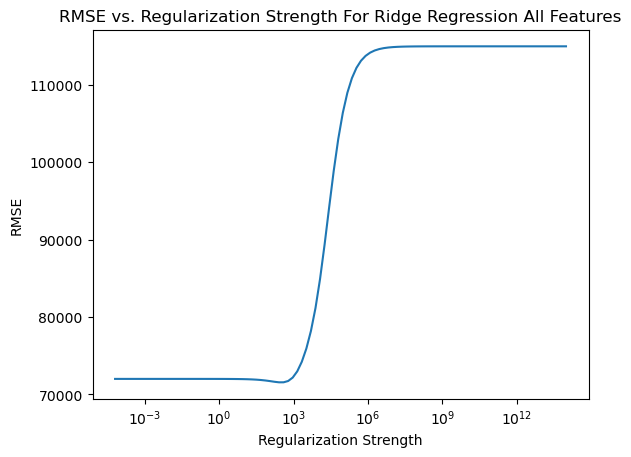

In [332]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

print("Features:", list(feature_names))
lowest_rmse = np.inf
best_alpha = None

regs = []
rmses = []

for alpha in np.logspace(-6, 20, num=100, base=5):
    pipe = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    print(f"reg: {alpha} \\ RMSE: {rmse}")
    regs.append(alpha)
    rmses.append(rmse)
    if rmse < lowest_rmse:
        lowest_rmse = rmse
        best_alpha = alpha

print(f"Best alpha: {best_alpha} \\ RMSE: {lowest_rmse}")

# Plot the RMSEs vs. the regularization parameter
plt.plot(regs, rmses)
plt.xscale('log')
plt.xlabel('Regularization Strength')
plt.ylabel('RMSE')
plt.title('RMSE vs. Regularization Strength For Ridge Regression All Features')

Predicted: [272765.18801103] \ Actual: [326600.] \ Difference: [-53834.81198897]
Predicted: [194472.818044] \ Actual: [111400.] \ Difference: [83072.818044]
Predicted: [239140.86224534] \ Actual: [308400.] \ Difference: [-69259.13775466]
Predicted: [271231.13725045] \ Actual: [218000.] \ Difference: [53231.13725045]
Predicted: [298235.20346041] \ Actual: [378000.] \ Difference: [-79764.79653959]
Predicted: [309900.42879691] \ Actual: [301700.] \ Difference: [8200.42879691]
Predicted: [112830.43748602] \ Actual: [117600.] \ Difference: [-4769.56251398]
Predicted: [45581.92031598] \ Actual: [40000.] \ Difference: [5581.92031598]
Predicted: [363539.56004869] \ Actual: [500001.] \ Difference: [-136461.43995131]
Predicted: [125297.87906228] \ Actual: [146800.] \ Difference: [-21502.12093772]
Predicted: [188233.44244445] \ Actual: [139200.] \ Difference: [49033.44244445]
Predicted: [241047.58362679] \ Actual: [223800.] \ Difference: [17247.58362679]
Predicted: [269262.21622315] \ Actual: [17

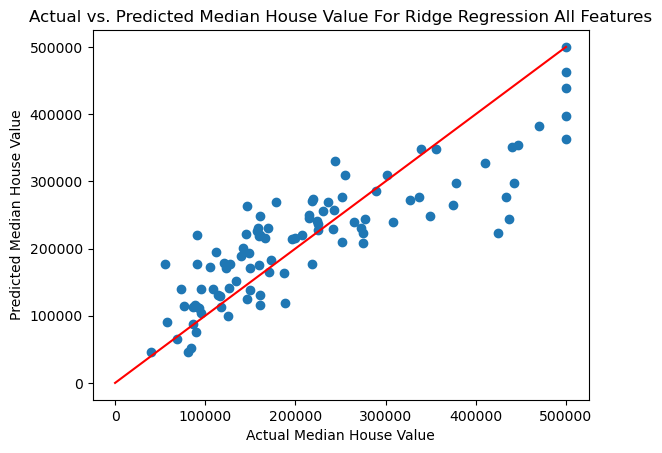

In [333]:
pipe = make_pipeline(StandardScaler(), Ridge(alpha=best_alpha))
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

test_vals = []
pred_vals = []

for ex in range(0, 100):
    print(f"Predicted: {y_test_pred[ex]} \\ Actual: {y_test[ex]} \\ Difference: {y_test_pred[ex] - y_test[ex]}")
    test_vals.append(y_test[ex])
    pred_vals.append(y_test_pred[ex])

plt.scatter(test_vals, pred_vals)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value For Ridge Regression All Features')
# Plot y=x line
x = np.linspace(0, 500000, 1000)
y = x
plt.plot(x, y, '-r', label='y=x')

Now lets just use ['latitude', 'housing_median_age', 'median_income']

Features: ['latitude', 'housing_median_age', 'median_income']
reg: 6.4e-05 \ RMSE: 80592.94470412587
reg: 9.766700135941112e-05 \ RMSE: 80592.94469977349
reg: 0.000149044424289675 \ RMSE: 80592.94469313156
reg: 0.00022744878108925528 \ RMSE: 80592.94468299566
reg: 0.0003470975064350104 \ RMSE: 80592.94466752779
reg: 0.0005296870723880683 \ RMSE: 80592.94464392313
reg: 0.000808327312796687 \ RMSE: 80592.94460790131
reg: 0.0012335453868400495 \ RMSE: 80592.9445529304
reg: 0.0018824481089594104 \ RMSE: 80592.94446904234
reg: 0.002872704094011867 \ RMSE: 80592.94434102553
reg: 0.004383881166485043 \ RMSE: 80592.94414566658
reg: 0.006690008247602992 \ RMSE: 80592.94384754135
reg: 0.010209266322079885 \ RMSE: 80592.94339259213
reg: 0.015579819183705712 \ RMSE: 80592.9426983273
reg: 0.023775534709286957 \ RMSE: 80592.94163886762
reg: 0.03628258094957272 \ RMSE: 80592.94002213134
reg: 0.055368920045700945 \ RMSE: 80592.93755502984
reg: 0.08449556858394687 \ RMSE: 80592.93379038248
reg: 0.12894

Text(0.5, 1.0, 'RMSE vs. Regularization Strength For Ridge Regression Feature LASSO Subset')

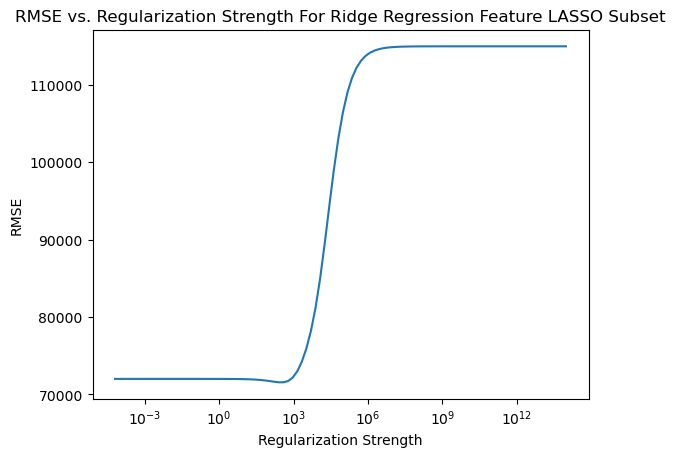

In [334]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X_train_sub = X_train[:, [1,2,7]]
X_val_sub = X_val[:, [1,2,7]]
X_test_sub = X_test[:, ]

print("Features:", [feature_names[1], feature_names[2], feature_names[7]])
lowest_rmse = np.inf
best_alpha = None
for alpha in np.logspace(-6, 20, num=100, base=5):
    pipe = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    pipe.fit(X_train_sub, y_train)
    pred = pipe.predict(X_val_sub)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    print(f"reg: {alpha} \\ RMSE: {rmse}")
    if rmse < lowest_rmse:
        lowest_rmse = rmse
        best_alpha = alpha

print(f"Best alpha: {best_alpha} \\ RMSE: {lowest_rmse}")

# Plot the RMSEs vs. the regularization parameter
plt.plot(regs, rmses)
plt.xscale('log')
plt.xlabel('Regularization Strength')
plt.ylabel('RMSE')
plt.title('RMSE vs. Regularization Strength For Ridge Regression Feature LASSO Subset')

Predicted: [272808.66827017] \ Actual: [326600.] \ Difference: [-53791.33172983]
Predicted: [195852.00427762] \ Actual: [111400.] \ Difference: [84452.00427762]
Predicted: [237600.81661957] \ Actual: [308400.] \ Difference: [-70799.18338043]
Predicted: [268846.01564879] \ Actual: [218000.] \ Difference: [50846.01564879]
Predicted: [296606.11257017] \ Actual: [378000.] \ Difference: [-81393.88742983]
Predicted: [309921.09927279] \ Actual: [301700.] \ Difference: [8221.09927279]
Predicted: [113635.75975044] \ Actual: [117600.] \ Difference: [-3964.24024956]
Predicted: [50997.28828698] \ Actual: [40000.] \ Difference: [10997.28828698]
Predicted: [360556.64865132] \ Actual: [500001.] \ Difference: [-139444.35134868]
Predicted: [130493.52211613] \ Actual: [146800.] \ Difference: [-16306.47788387]
Predicted: [186583.51593741] \ Actual: [139200.] \ Difference: [47383.51593741]
Predicted: [239387.59495472] \ Actual: [223800.] \ Difference: [15587.59495472]
Predicted: [266936.9610462] \ Actual:

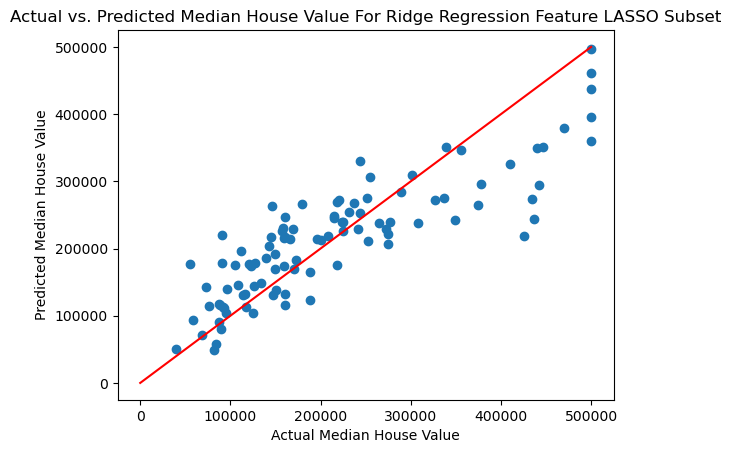

In [335]:
pipe = make_pipeline(StandardScaler(), Ridge(alpha=396.45283816618235))
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

test_vals = []
pred_vals = []

for ex in range(0, 100):
    print(f"Predicted: {y_test_pred[ex]} \\ Actual: {y_test[ex]} \\ Difference: {y_test_pred[ex] - y_test[ex]}")
    test_vals.append(y_test[ex])
    pred_vals.append(y_test_pred[ex])

plt.scatter(test_vals, pred_vals)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value For Ridge Regression Feature LASSO Subset')
# Plot y=x line
x = np.linspace(0, 500000, 1000)
y = x
plt.plot(x, y, '-r', label='y=x')

## Overall model fitting thoughts

Our model seems to overpredict housing price on houses under $300,000. For houses above that cost, we seem to underpredict. THis is most likely to some bimodality of the distribution underlying the data. Ensemble modeling would most likely rectify this.